In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv('/home/anonymous/datasets/votes.csv')

In [3]:
df.head()

,names,that_col,you,them,me,total
0,kimwe,8,22,32,40,134
1,ngahu,83,15,65,25,253
2,kimwe,13,20,50,20,153
3,thade,49,3,31,30,144
4,ngahu,12,60,10,5,97


In [4]:
df['us']=df['total']/10
df.head()

,names,that_col,you,them,me,total,us
0,kimwe,8,22,32,40,134,13.4
1,ngahu,83,15,65,25,253,25.3
2,kimwe,13,20,50,20,153,15.3
3,thade,49,3,31,30,144,14.4
4,ngahu,12,60,10,5,97,9.7


In [5]:
x=df[['that_col','you','them','me','us']]
x.head()

,that_col,you,them,me,us
0,8,22,32,40,13.4
1,83,15,65,25,25.3
2,13,20,50,20,15.3
3,49,3,31,30,14.4
4,12,60,10,5,9.7


<AxesSubplot: >

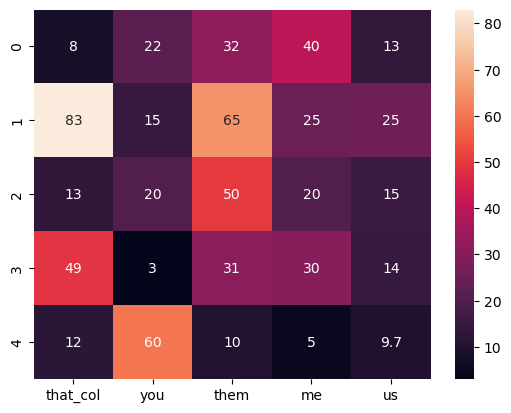

In [6]:
sns.heatmap(x,annot=True)

<AxesSubplot: >

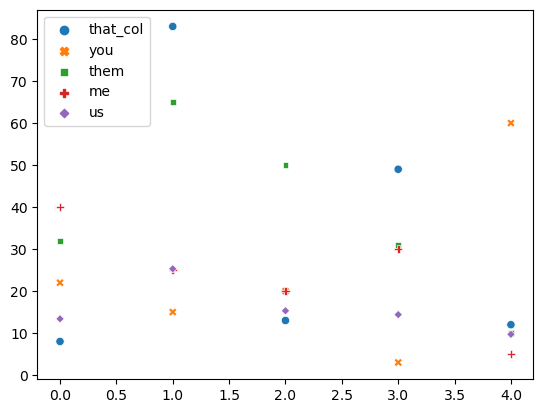

In [7]:
sns.scatterplot(x)

In [8]:
#let's do some machine learning Hahaha.....

In [9]:
y=df['total']

In [10]:
X=df[['that_col','you','them','me']]

In [11]:
Tt_model=DecisionTreeRegressor(random_state=1)
Tt_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [12]:
print("making predictions for total")
print(X.head())

print("the predicted total is:")
print(Tt_model.predict(X.head()))

making predictions for total
   that_col  you  them  me
0         8   22    32  40
1        83   15    65  25
2        13   20    50  20
3        49    3    31  30
4        12   60    10   5
the predicted total is:
[134. 253. 153. 144.  97.]


In [13]:
from sklearn.metrics import mean_absolute_error

In [14]:
predicted_total=Tt_model.predict(X)
mean_absolute_error(y,predicted_total)

0.0

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=0)

Tt_model=DecisionTreeRegressor()
Tt_model.fit(train_X,train_y)

val_total = Tt_model.predict(val_X)
print(mean_absolute_error(val_y,val_total))

55.0


In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rf_model=RandomForestRegressor(random_state=0)
rf_model.fit(train_X,train_y)

rf_pred = rf_model.predict(val_X)
print(mean_absolute_error(val_y,rf_pred))

23.254999999999995
